# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2. Import Dataset

In [2]:
df = pd.read_csv('data/house_price.csv', index_col= 'ID')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df = df.rename(columns= {'black': 'b'})

# 3. Exploratory Data Analysis (EDA)

### Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  b        333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [5]:
df.shape

(333, 14)

###  Check Missing Value

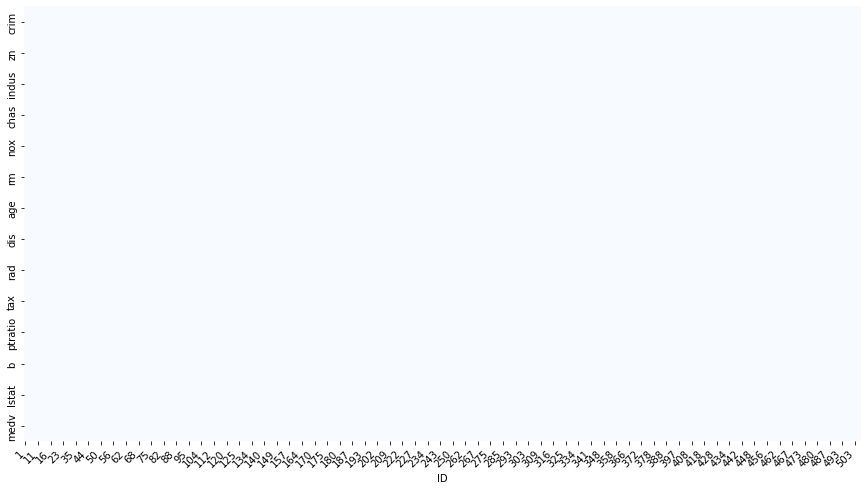

In [6]:
plot_missing_value(df)

`The dataset is clean from missing value`

### Data Description

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


## A. Numerical Features

### Target Variable Distribution

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

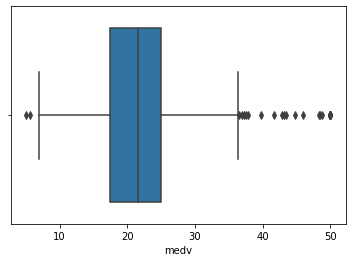

In [8]:
sns.boxplot(df['medv'])

### Numeric Variable Distribution

In [9]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

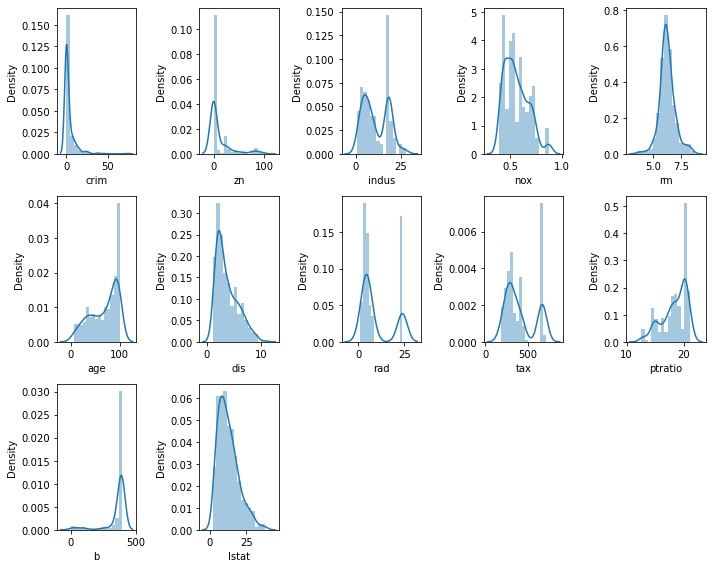

In [10]:
numeric = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
           'ptratio', 'b', 'lstat']

x = plt.figure(figsize=(10, 8))

for i, j in enumerate(numeric):
    x.add_subplot(3, 5, i+1)
    sns.distplot(df[j], bins=15)
    x.tight_layout()

plt.tight_layout()

`Although several columns have a skew, I don't handle it because maybe the number of value supposed to be. But, if the model has higher value of error, I'll handle that in the evaluation part.`

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

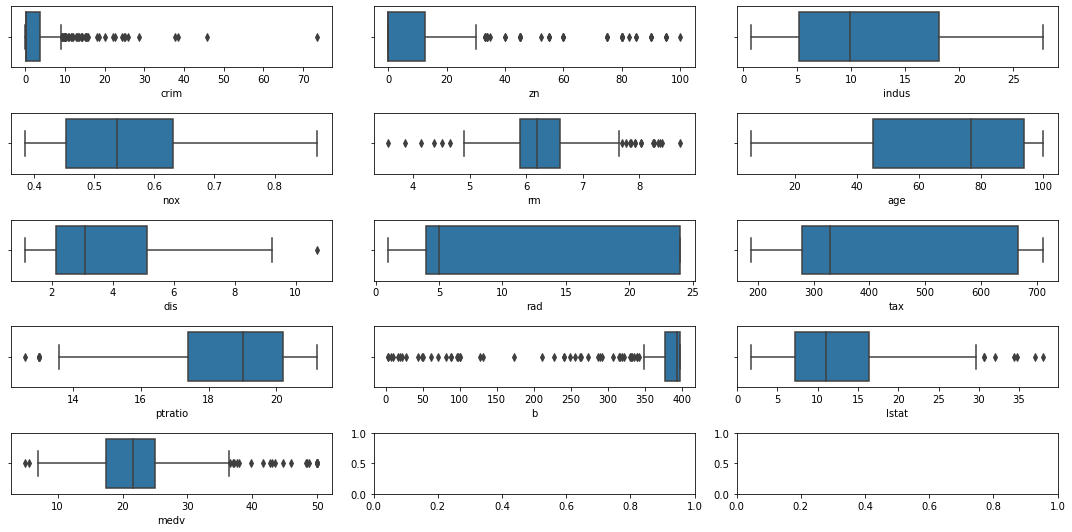

In [11]:
fig, axs = plt.subplots(5,3, figsize = (15,7.5))
sns.boxplot(df['crim'], ax = axs[0,0])
sns.boxplot(df['zn'], ax = axs[0,1])
sns.boxplot(df['indus'], ax = axs[0,2])
sns.boxplot(df['nox'], ax = axs[1,0])
sns.boxplot(df['rm'], ax = axs[1,1])
sns.boxplot(df['age'], ax = axs[1,2])
sns.boxplot(df['dis'], ax = axs[2,0])
sns.boxplot(df['rad'], ax = axs[2,1])
sns.boxplot(df['tax'], ax = axs[2,2])
sns.boxplot(df['ptratio'], ax = axs[3,0])
sns.boxplot(df['b'], ax = axs[3,1])
sns.boxplot(df['lstat'], ax = axs[3,2])
sns.boxplot(df['medv'], ax = axs[4,0])


plt.tight_layout()
plt.show()

`Although many columns have outliers, I don’t handle them yet because the values might supposed to be like that. But, if the model has higher value of error, I’ll handle in the evaluation part`

## Correlation Matrix

In [12]:
from jcopml.plot import plot_correlation_matrix

In [13]:
plot_correlation_matrix(df,target_col='medv', numeric_col='auto')

interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

`Because Github can't display the correlation plot, I've captured a picture of it.`

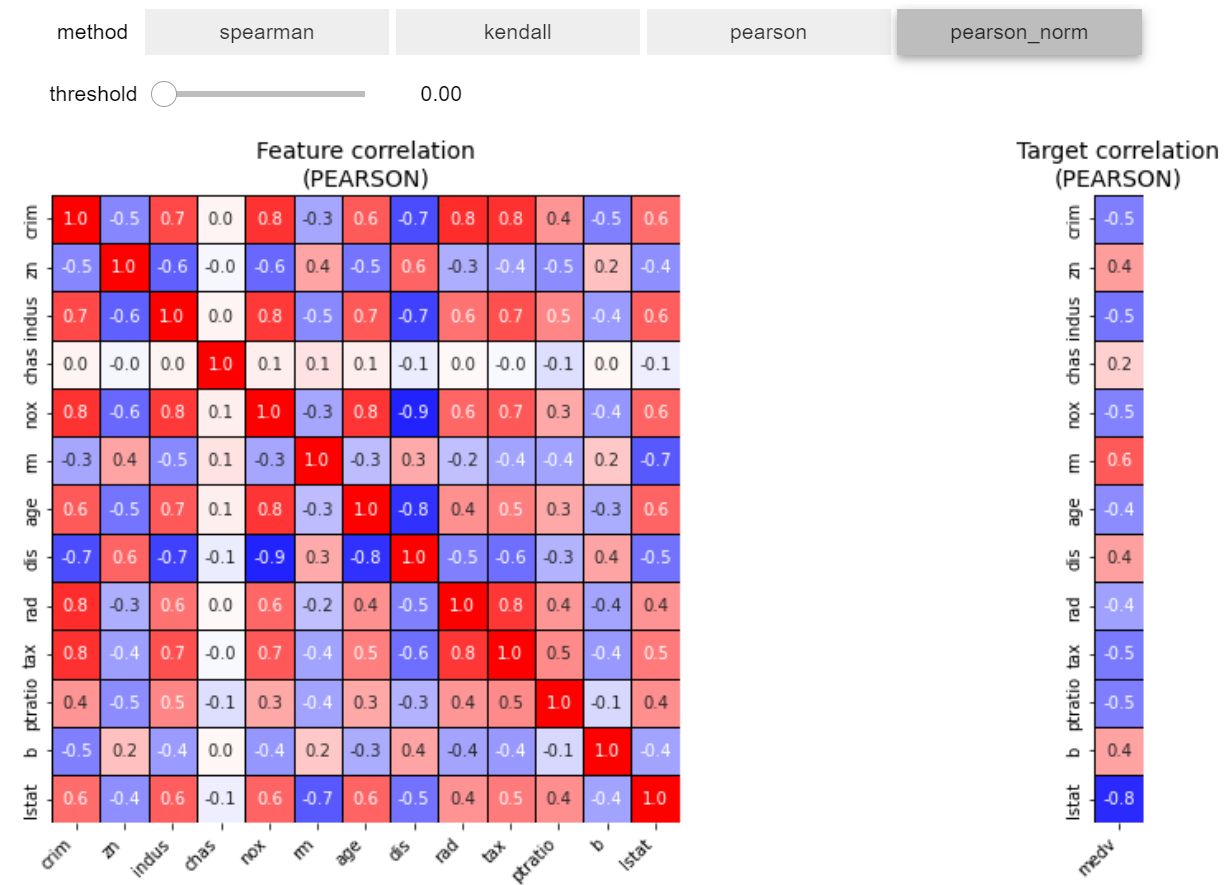

`The plot of the correlation matrix explains several columns have a strong positive and negative correlation on the target variable by using Pearson normalization. I set a threshold is 0.5`

**Positive Correlation**
1. rm

**Negatvie Correlation**
1. crim
2. indus
3. tax
4. ptratio
5. lstat

## Positive Correlation

### rm vs medv

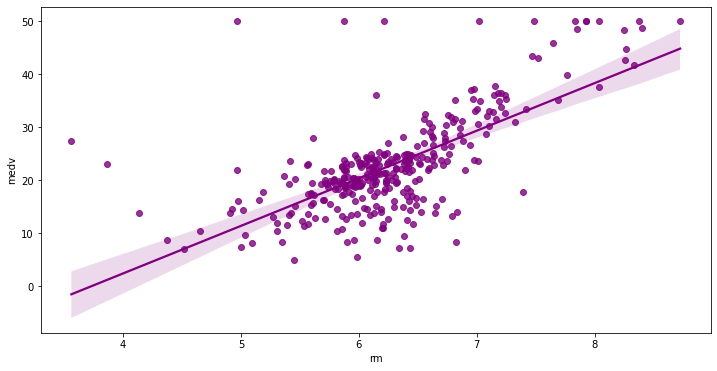

In [14]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='rm', y = 'medv', color= 'purple', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

## Negative Correlation

### crim vs medv

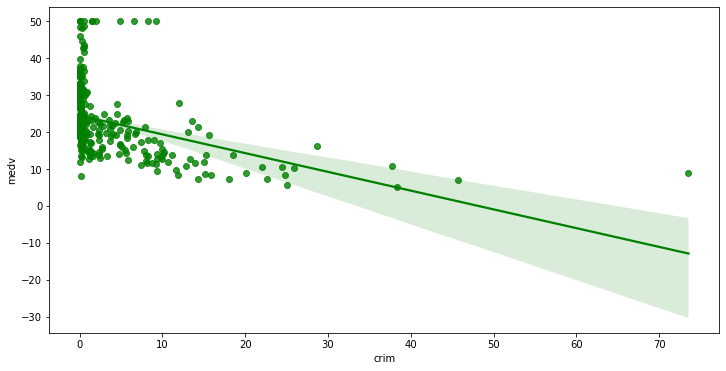

In [15]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='crim', y = 'medv', color= 'g', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### indus vs medv

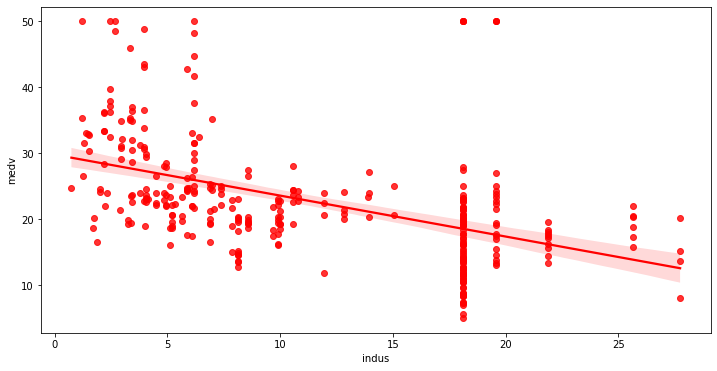

In [16]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='indus', y = 'medv', color= 'r', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### tax vs medv

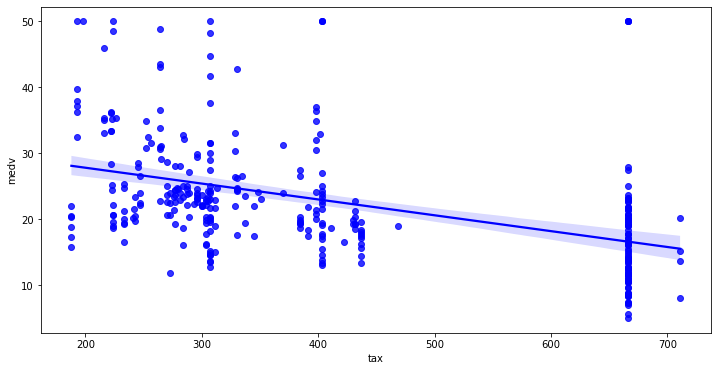

In [17]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='tax', y = 'medv', color= 'b', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### ptratio vs medv

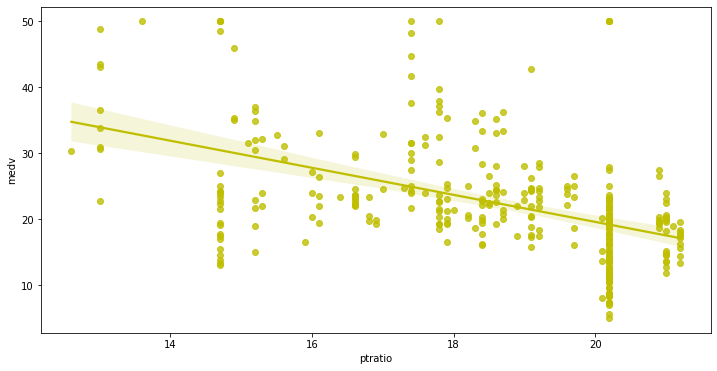

In [18]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='ptratio', y = 'medv', color= 'y', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### lstat vs medv

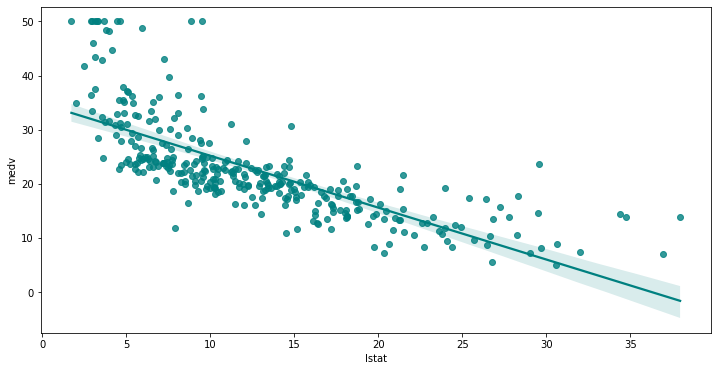

In [19]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='lstat', y = 'medv', color= 'teal', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

## B. Categorical Features

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chas', ylabel='count'>

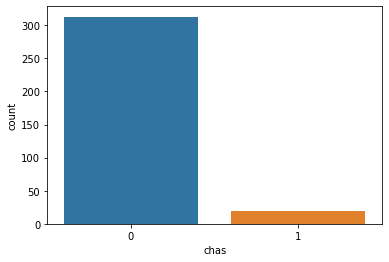

In [20]:
sns.countplot('chas', data = df)

**Insight**

`1. More houses not crossed by the charles river` <br>

# 4. Dataset Splitting

In [21]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [22]:
X = df.drop(columns="medv")
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 13), (67, 13), (266,), (67,))

# 5. Modeling

In [23]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [24]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [25]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas'])
])



pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 0.00016646452049870526, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.9766149558326531}
0.7256303472703585 0.6883770584014028 0.7390022389620521


# 6. Feature Importance

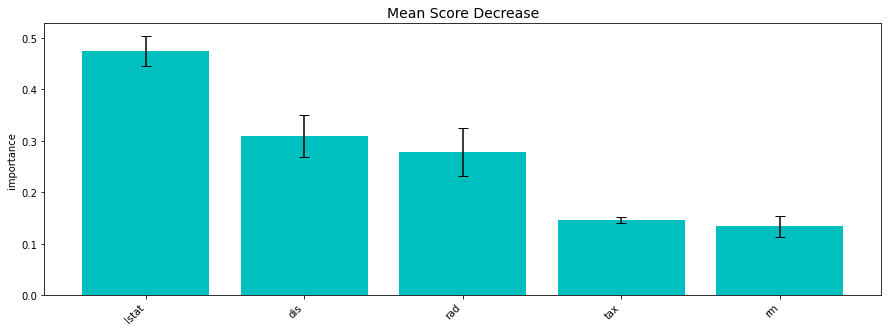

In [26]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=5)

`Lower status of population have a higher influence for house price in Boston.`

In [27]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['lstat', 'dis', 'rad', 'tax', 'rm'])])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 0.016516831428058865, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.7282163486118597}
0.6562281751504133 0.6401468117547452 0.6788993493402461


`So Feature Importance is decreased test scores more than models that don't. Thus, I'll keep take all of columns`

# 7. Polynomial Features

In [28]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=3), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas'])
])



pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 40.52135730136982, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.9548652806631943}
0.9378003861409242 0.02587951920994196 0.8616645215036656


C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.426e+02, tolerance: 2.190e+00
  model = cd_fast.enet_coordinate_descent(


`Polynomial feature can increase the test score of model`

# 8. Fine Tuning

In [29]:
from jcopml.tuning.space import Integer, Real

In [30]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=3, transform= 'yeo-johnson'), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas'])
])



pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


parameter = {'prep__numeric__poly__degree': Integer(low=1, high=3),
             'prep__numeric__poly__interaction_only': [True, False],
             'algo__fit_intercept': [True, False],
             'algo__alpha': Real(low=-2, high=2, prior='log-uniform'),
             'algo__l1_ratio': Real(low=0, high=3, prior='uniform')}


model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 925, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=2.1242177333881

{'algo__alpha': 0.021057814970278994, 'algo__fit_intercept': False, 'algo__l1_ratio': 0.7129126319771991, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': False}
0.8977005835903479 0.8521892563955294 0.8955813919933786


C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.820e+02, tolerance: 1.610e+01
  model = cd_fast.enet_coordinate_descent(


`Tuning parameter can increase the test score of model`

# 9. Evaluation 

In [31]:
from jcopml.plot import plot_residual
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


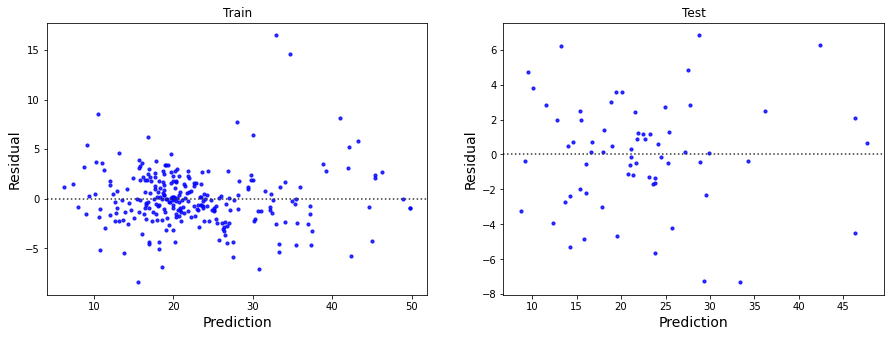

In [32]:
plot_residual(X_train, y_train, X_test, y_test, model)

`The residual plot is good enough.`

## Error Checking

In [33]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error', ascending=False).head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,pred,actual,error
ID,,,,,,,,,,,,,,,,
167,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,42.370592,50.0,7.629408
5,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,28.746245,36.2,7.453755
266,0.76162,20.0,3.97,0,0.6470,5.560,62.8,1.9865,5,264,13.0,392.40,10.45,29.354954,22.8,6.554954
161,1.27346,0.0,19.58,1,0.6050,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,33.430669,27.0,6.430669
212,0.37578,0.0,10.59,1,0.4890,5.404,88.6,3.6650,4,277,18.6,395.24,23.98,13.285254,19.3,6.014746
385,20.08490,0.0,18.10,0,0.7000,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,14.244643,8.8,5.444643
65,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,27.584742,33.0,5.415258
115,0.14231,0.0,10.01,0,0.5470,6.254,84.2,2.2565,6,432,17.8,388.74,10.45,23.797164,18.5,5.297164
428,37.66190,0.0,18.10,0,0.6790,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,15.804315,10.9,4.904315


`There is no significant error values to handled`

# 10. Summary Result

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.8977005835903479
R2 Test : 0.8955813919933786
MAE Train : 2.0144853566251633
MAE Test : 2.3815456744684838
MSE Train : 8.420709058306493
MSE Test : 9.39750584576987
RMSE Train : 2.901845801952008
RMSE Test : 3.0655351646604663


# 11. Save the Model

In [36]:
save_model(model.best_estimator_, "The_Boston_Housing_Price_Prediction_ElasticNet.pkl")

Model is pickled as model/The_Boston_Housing_Price_Prediction_ElasticNet.pkl


____

# Try to Binning Feature

In [37]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  b        333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.1 KB


## 1. Binning tax Column

In [39]:
df['tax'] = pd.cut(df.tax, bins = np.arange(100, 750, 125), labels = ['Low', 'Medium Low', 'Medium', 'Medium High', 'High'])

In [40]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,Medium Low,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,Medium Low,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,Low,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,Low,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,Medium Low,15.2,395.60,12.43,22.9


## 2. Dataset Splitting

In [41]:
X = df.drop(columns="medv")
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 13), (67, 13), (266,), (67,))

## 3. Modeling

In [42]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [43]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas', 'tax'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 0.0009808478272431492, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.9868869366005175}
0.7311590697062278 0.6870091613794506 0.75456543700627


## 4. Feature Importance

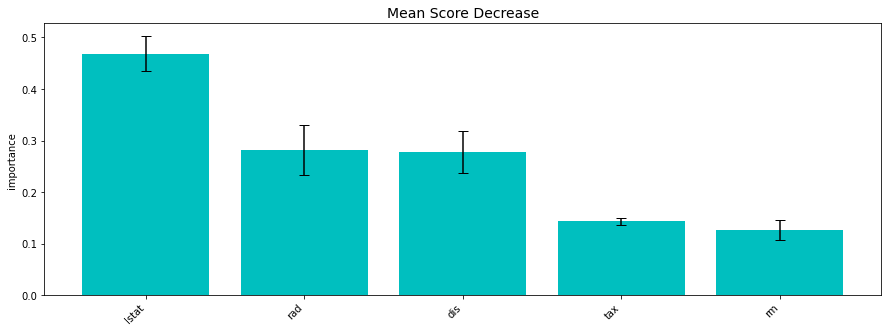

In [44]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=5)

In [45]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['lstat', 'rad', 'dis', 'rm']),
    ('categoric', cat_pipe(encoder='onehot'), ['tax'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 0.01125325085818132, 'algo__fit_intercept': False, 'algo__l1_ratio': 0.046002642021752756}
0.6575530301762688 0.6312624871394048 0.6897834173961537


`So Feature Importance is decreased test scores more than models that don't. Thus, I'll keep take all of columns`

## 5. Polynomial Feature

In [46]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=3), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas', 'tax'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_poly_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 0.00016430608316583367, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.15504161672774422, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': True}
0.9112581269316925 0.8217700423015544 0.8110331411821304


C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.807e+02, tolerance: 2.190e+00
  model = cd_fast.enet_coordinate_descent(


`Polynomial feature can increse test scores more than models that don't`

## 6. Fine Tuning

In [47]:
rsp.enet_poly_params

{'prep__numeric__poly__degree': Integer(low=1, high=3),
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__fit_intercept': [True, False],
 'algo__alpha': Real(low=-4, high=2, prior='log-uniform'),
 'algo__l1_ratio': Real(low=0, high=1, prior='uniform')}

In [48]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=3, transform= 'yeo-johnson'), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas', 'tax'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


parameter = {'prep__numeric__poly__degree': Integer(low=1, high=3),
             'prep__numeric__poly__interaction_only': [True, False],
             'algo__fit_intercept': [True, False],
             'algo__alpha': Real(low=-2, high=2, prior='log-uniform'),
             'algo__l1_ratio': Real(low=0, high=3, prior='uniform')}


model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 925, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=2.1242177333881

{'algo__alpha': 0.021057814970278994, 'algo__fit_intercept': False, 'algo__l1_ratio': 0.7129126319771991, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': False}
0.8974622766750755 0.8506999701549981 0.8901411225781041


C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.893e+02, tolerance: 1.610e+01
  model = cd_fast.enet_coordinate_descent(


## 7. Evaluation 

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


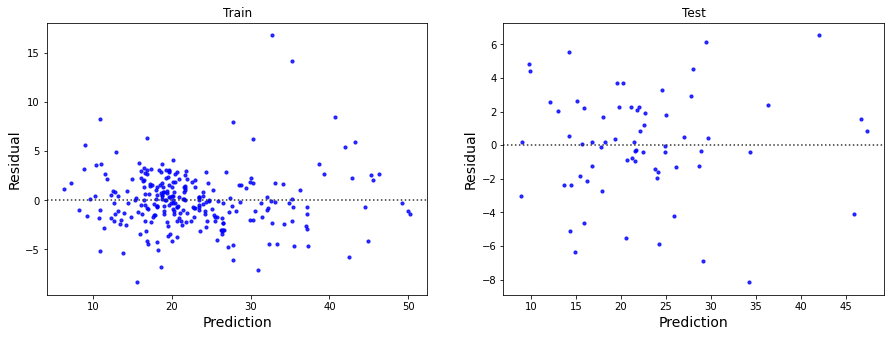

In [49]:
plot_residual(X_train, y_train, X_test, y_test, model)

`Transform the data by using yeo-johnson can figure out the data spread equally`

### Error Checking

In [50]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error').head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,pred,actual,error
ID,,,,,,,,,,,,,,,,
15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,Medium Low,21.0,380.02,10.26,18.167243,18.2,0.032757
434,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,High,20.2,100.19,16.22,14.228677,14.3,0.071323
477,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,High,20.2,396.21,18.68,16.792615,16.7,0.092615
252,0.21409,22.0,5.86,0,0.431,6.438,8.9,7.3967,7,Medium Low,19.1,377.07,3.59,24.929758,24.8,0.129758
195,0.01439,60.0,2.93,0,0.401,6.604,18.8,6.2196,1,Medium Low,15.6,376.70,4.38,28.886955,29.1,0.213045
237,0.52058,0.0,6.20,1,0.507,6.631,76.5,4.1480,8,Medium Low,17.4,388.45,9.54,24.856899,25.1,0.243101
472,4.03841,0.0,18.10,0,0.532,6.229,90.7,3.0993,24,High,20.2,395.33,12.87,19.351792,19.6,0.248208
480,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,24,High,20.2,383.32,13.11,21.649406,21.4,0.249406
13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,Medium Low,15.2,390.50,15.71,21.441261,21.7,0.258739


## 8. Summary Result

In [51]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.8974622766750755
R2 Test : 0.8901411225781041
MAE Train : 2.038021732448312
MAE Test : 2.4178698329376074
MSE Train : 8.440325135020512
MSE Test : 9.887121294669207
RMSE Train : 2.9052237667726235
RMSE Test : 3.144379317873276


`So binning feature can help to increse the model performance.`

## 9. Save the Model

In [52]:
save_model(model.best_estimator_, "The_Boston_Housing_Price_Prediction_ElasticNet_with_Binning.pkl")

Model is pickled as model/The_Boston_Housing_Price_Prediction_ElasticNet_with_Binning.pkl
